# IPL Bowling Predictor

In [1]:
import pandas as pd

In [2]:
ipl = pd.read_csv("bowlingdata.csv")

In [3]:
ipl.head()

,MatchID,InningsNo,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
0,1,1,4.0,0,20,2,2,1,5.00,1,24,15,7,0,0,1,1,12.0
1,1,1,4.0,0,35,0,1,1,8.75,2,24,12,7,1,0,3,2,0.0
2,1,1,4.0,0,23,1,1,0,5.75,3,24,11,10,1,0,1,1,24.0
3,1,1,4.0,0,15,0,0,0,3.75,4,24,10,13,1,0,0,0,0.0
4,1,1,4.0,0,38,1,0,0,9.50,5,24,7,10,1,0,5,1,24.0


In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MatchID                857 non-null    int64  
 1   InningsNo              857 non-null    int64  
 2   Overs                  857 non-null    float64
 3   Maidens                857 non-null    int64  
 4   Runs                   857 non-null    int64  
 5   Wickets                857 non-null    int64  
 6   Wides                  857 non-null    int64  
 7   NoBalls                857 non-null    int64  
 8   Economy                857 non-null    float64
 9   BowlingOrder           857 non-null    int64  
 10  TotalLegalBallsBowled  857 non-null    int64  
 11  DotBalls               857 non-null    int64  
 12  Ones                   857 non-null    int64  
 13  Twos                   857 non-null    int64  
 14  Threes                 857 non-null    int64  
 15  Fours 

In [5]:
ipl['Runs'].value_counts()

23    36
29    34
32    33
25    32
20    30
35    30
31    30
28    29
24    29
22    27
36    26
26    26
30    26
40    26
34    24
27    23
14    23
33    20
21    19
18    19
19    19
39    18
43    17
17    16
37    16
8     15
15    15
42    14
38    14
11    14
10    12
13    11
44    11
16    11
41    10
47    10
12    10
48     9
7      9
45     9
6      8
46     8
50     6
52     5
9      5
5      4
51     3
49     2
57     2
58     2
54     2
60     2
0      1
59     1
1      1
4      1
63     1
64     1
Name: Runs, dtype: int64

In [6]:
ipl.describe()

,MatchID,InningsNo,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
count,857.00000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,37.36056,1.500583,3.322520,0.032672,27.987165,0.990665,0.819137,0.084014,8.719253,3.427071,19.997666,7.737456,7.449242,1.191365,0.067678,2.439907,1.239207,9.571027
std,21.52524,0.500292,1.001841,0.184331,11.262110,1.074299,1.098515,0.301769,3.348249,1.703382,5.974439,3.876289,3.640383,1.183323,0.277831,1.724329,1.181023,9.633395
min,1.00000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.00000,1.000000,3.000000,0.000000,20.000000,0.000000,0.000000,0.000000,6.500000,2.000000,18.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.00000,2.000000,4.000000,0.000000,28.000000,1.000000,0.000000,0.000000,8.330000,3.000000,24.000000,8.000000,7.000000,1.000000,0.000000,2.000000,1.000000,8.000000
75%,56.00000,2.000000,4.000000,0.000000,36.000000,2.000000,1.000000,0.000000,10.500000,5.000000,24.000000,10.000000,10.000000,2.000000,0.000000,4.000000,2.000000,18.000000
max,76.00000,2.000000,4.000000,2.000000,64.000000,5.000000,6.000000,2.000000,36.000000,8.000000,24.000000,19.000000,18.000000,7.000000,3.000000,9.000000,6.000000,24.000000


In [7]:
%matplotlib inline

# Train-Test Splitting

In [8]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(ipl, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 685
Rows in test set: 172



In [10]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
for train_index,test_index in kf.split(ipl):
    print(len(train_index),"  ",len(test_index))

571    286
571    286
572    285


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(ipl, ipl['Ones']):
    strat_train_set = ipl.loc[train_index]
    strat_test_set = ipl.loc[test_index]
    
print(type(strat_test_set))

<class 'pandas.core.frame.DataFrame'>


In [12]:
strat_test_set['Ones'].value_counts()

8     19
6     18
7     17
4     15
9     15
5     14
10    12
11    11
3     11
13     8
2      8
12     8
14     6
1      5
15     2
16     2
0      1
Name: Ones, dtype: int64

In [13]:
strat_train_set['Ones'].value_counts()

8     77
6     72
7     68
4     59
5     58
9     57
10    46
3     43
11    42
2     34
12    32
13    30
14    22
1     19
15    10
16     6
0      6
17     2
18     2
Name: Ones, dtype: int64

In [14]:
ipl = strat_train_set.copy()

# Looking for Correlations

In [15]:
corr_matrix = ipl.corr()
print(corr_matrix)
corr_matrix['DotBalls'].sort_values(ascending=False)

                        MatchID  InningsNo     Overs   Maidens      Runs  \
MatchID                1.000000  -0.026172  0.018199 -0.024296  0.003813   
InningsNo             -0.026172   1.000000 -0.110960  0.016570 -0.110598   
Overs                  0.018199  -0.110960  1.000000  0.100640  0.576475   
Maidens               -0.024296   0.016570  0.100640  1.000000 -0.125722   
Runs                   0.003813  -0.110598  0.576475 -0.125722  1.000000   
Wickets               -0.021871  -0.005704  0.335374  0.170126 -0.035012   
Wides                  0.021902  -0.031627  0.270499 -0.035995  0.324683   
NoBalls               -0.074298  -0.055689  0.074164 -0.000806  0.222548   
Economy               -0.057992   0.020632 -0.351110 -0.184816  0.448760   
BowlingOrder          -0.023326  -0.014344 -0.382578 -0.077397 -0.241113   
TotalLegalBallsBowled  0.017488  -0.104421  0.999143  0.099637  0.579127   
DotBalls              -0.014593  -0.036149  0.682599  0.306025  0.044748   
Ones        

DotBalls                 1.000000
Overs                    0.682599
TotalLegalBallsBowled    0.682499
Wickets                  0.493606
StrikeRate               0.375179
Maidens                  0.306025
Wides                    0.182738
Threes                   0.123769
Fours                    0.102780
Twos                     0.075616
Runs                     0.044748
NoBalls                  0.038873
Ones                    -0.002150
MatchID                 -0.014593
InningsNo               -0.036149
Sixes                   -0.091815
BowlingOrder            -0.440067
Economy                 -0.565548
Name: DotBalls, dtype: float64

array([[<AxesSubplot:xlabel='DotBalls', ylabel='DotBalls'>,
        <AxesSubplot:xlabel='Economy', ylabel='DotBalls'>,
        <AxesSubplot:xlabel='BowlingOrder', ylabel='DotBalls'>,
        <AxesSubplot:xlabel='Runs', ylabel='DotBalls'>],
       [<AxesSubplot:xlabel='DotBalls', ylabel='Economy'>,
        <AxesSubplot:xlabel='Economy', ylabel='Economy'>,
        <AxesSubplot:xlabel='BowlingOrder', ylabel='Economy'>,
        <AxesSubplot:xlabel='Runs', ylabel='Economy'>],
       [<AxesSubplot:xlabel='DotBalls', ylabel='BowlingOrder'>,
        <AxesSubplot:xlabel='Economy', ylabel='BowlingOrder'>,
        <AxesSubplot:xlabel='BowlingOrder', ylabel='BowlingOrder'>,
        <AxesSubplot:xlabel='Runs', ylabel='BowlingOrder'>],
       [<AxesSubplot:xlabel='DotBalls', ylabel='Runs'>,
        <AxesSubplot:xlabel='Economy', ylabel='Runs'>,
        <AxesSubplot:xlabel='BowlingOrder', ylabel='Runs'>,
        <AxesSubplot:xlabel='Runs', ylabel='Runs'>]], dtype=object)

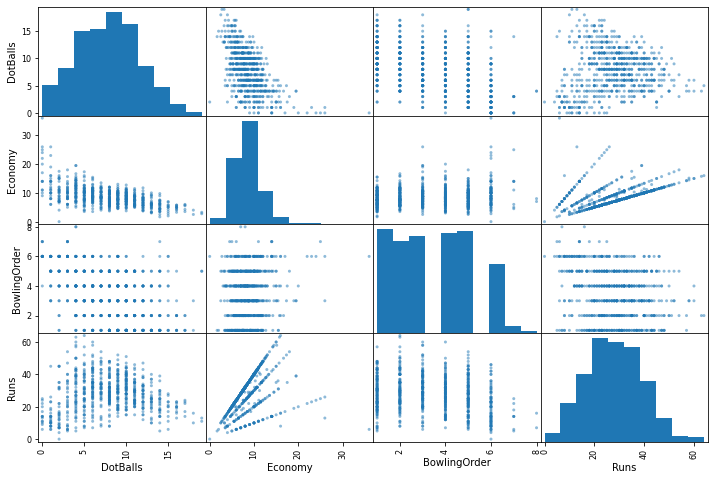

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["DotBalls", "Economy", "BowlingOrder", "Runs"]
scatter_matrix(ipl[attributes], figsize = (12,8))

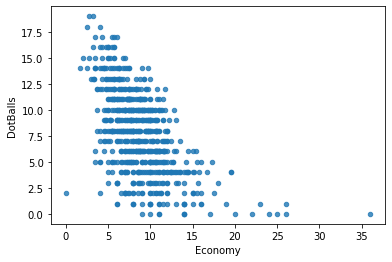

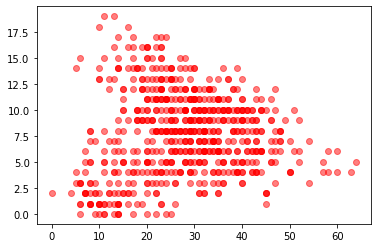

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
ipl.plot(kind="scatter", x="Economy", y="DotBalls", alpha=0.8)
plt.show()
plt.scatter(ipl['Runs'],ipl['DotBalls'],c='r',alpha=0.5)
plt.show()

# Trying out Attribute combinations

In [18]:
ipl["EconomyDotBalls"] = ipl['Economy']/ipl['DotBalls']

In [19]:
ipl.head()

,MatchID,InningsNo,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,EconomyDotBalls
258,22,2,2.0,0,20,0,0,0,10.00,5,12,2,6,1,0,3,0,0.0,5.000000
446,39,1,4.0,0,33,1,0,0,8.25,5,24,6,13,2,0,1,2,24.0,1.375000
80,7,2,4.0,0,31,2,3,0,7.75,6,24,9,8,5,0,1,1,12.0,0.861111
534,46,2,3.0,0,36,1,0,0,12.00,3,18,4,8,1,0,2,3,18.0,3.000000
294,25,2,3.0,0,45,0,0,0,15.00,5,18,2,9,0,0,3,4,0.0,7.500000


In [20]:
corr_matrix = ipl.corr()
corr_matrix['Runs'].sort_values(ascending=False)

Runs                     1.000000
Sixes                    0.656436
Fours                    0.633400
TotalLegalBallsBowled    0.579127
Overs                    0.576475
Economy                  0.448760
Wides                    0.324683
Ones                     0.319006
Twos                     0.257628
NoBalls                  0.222548
StrikeRate               0.180699
Threes                   0.053900
DotBalls                 0.044748
MatchID                  0.003813
Wickets                 -0.035012
EconomyDotBalls         -0.085052
InningsNo               -0.110598
Maidens                 -0.125722
BowlingOrder            -0.241113
Name: Runs, dtype: float64

<AxesSubplot:xlabel='EconomyDotBalls', ylabel='Runs'>

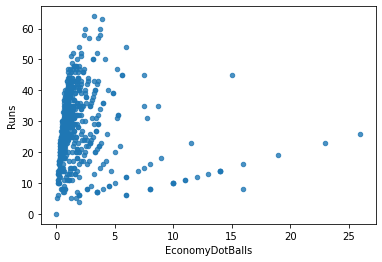

In [21]:
ipl.plot(kind="scatter", x="EconomyDotBalls", y="Runs", alpha=0.8)

In [22]:
ipl = strat_train_set.drop("Runs", axis=1)
ipl_labels = strat_train_set["Runs"].copy()

# Missing Attributes

In [23]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [24]:
a = ipl.dropna(subset=["Wides"]) #Option 1
a.shape
# Note that the original ipl dataframe will remain unchanged

(685, 17)

In [25]:
ipl.drop("Wides", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original ipl dataframe will remain unchanged

(685, 16)

In [26]:
median = ipl["Wides"].median() # Compute median for Option 3

In [27]:
ipl["Wides"].fillna(median) # Option 3
# Note that the original ipl dataframe will remain unchanged

258    0
446    0
80     3
534    0
294    0
      ..
680    3
726    0
796    4
815    2
498    0
Name: Wides, Length: 685, dtype: int64

In [28]:
ipl.shape

(685, 17)

In [29]:
ipl.describe() # before we started filling missing attributes

,MatchID,InningsNo,Overs,Maidens,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,37.414599,1.496350,3.323212,0.035036,0.970803,0.792701,0.084672,8.735635,3.433577,19.988321,7.763504,7.443796,1.176642,0.062774,2.410219,1.256934,9.627299
std,21.319426,0.500352,1.003081,0.191787,1.061980,1.064144,0.303703,3.467382,1.714331,5.989014,3.927651,3.654103,1.189394,0.271181,1.765379,1.148849,9.707407
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,6.500000,2.000000,18.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,8.330000,3.000000,24.000000,8.000000,7.000000,1.000000,0.000000,2.000000,1.000000,8.000000
75%,55.000000,2.000000,4.000000,0.000000,2.000000,1.000000,0.000000,10.500000,5.000000,24.000000,10.000000,10.000000,2.000000,0.000000,4.000000,2.000000,18.000000
max,76.000000,2.000000,4.000000,2.000000,5.000000,6.000000,2.000000,36.000000,8.000000,24.000000,19.000000,18.000000,7.000000,3.000000,9.000000,6.000000,24.000000


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(ipl)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([38.  ,  1.  ,  4.  ,  0.  ,  1.  ,  0.  ,  0.  ,  8.33,  3.  ,
       24.  ,  8.  ,  7.  ,  1.  ,  0.  ,  2.  ,  1.  ,  8.  ])

In [32]:
X = imputer.transform(ipl)
print(X)

[[22.  2.  2. ...  3.  0.  0.]
 [39.  1.  4. ...  1.  2. 24.]
 [ 7.  2.  4. ...  1.  1. 12.]
 ...
 [69.  1.  2. ...  2.  2.  6.]
 [73.  1.  4. ...  5.  2. 24.]
 [43.  2.  3. ...  2.  1.  9.]]


In [33]:
ipl_tr = pd.DataFrame(X, columns=ipl.columns)      #comverting the numpy array type x to the dataFrame

In [34]:
ipl_tr.describe()

,MatchID,InningsNo,Overs,Maidens,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,37.414599,1.496350,3.323212,0.035036,0.970803,0.792701,0.084672,8.735635,3.433577,19.988321,7.763504,7.443796,1.176642,0.062774,2.410219,1.256934,9.627299
std,21.319426,0.500352,1.003081,0.191787,1.061980,1.064144,0.303703,3.467382,1.714331,5.989014,3.927651,3.654103,1.189394,0.271181,1.765379,1.148849,9.707407
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,6.500000,2.000000,18.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,8.330000,3.000000,24.000000,8.000000,7.000000,1.000000,0.000000,2.000000,1.000000,8.000000
75%,55.000000,2.000000,4.000000,0.000000,2.000000,1.000000,0.000000,10.500000,5.000000,24.000000,10.000000,10.000000,2.000000,0.000000,4.000000,2.000000,18.000000
max,76.000000,2.000000,4.000000,2.000000,5.000000,6.000000,2.000000,36.000000,8.000000,24.000000,19.000000,18.000000,7.000000,3.000000,9.000000,6.000000,24.000000


# Creating a Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [36]:
ipl_num_tr = my_pipeline.fit_transform(ipl)

In [37]:
ipl_num_tr.shape
print(ipl_num_tr)

[[-0.723559    1.00732611 -1.32011167 ...  0.33432599 -1.09488122
  -0.99247248]
 [ 0.07441851 -0.99272718  0.67520275 ... -0.79940323  0.64726428
   1.48167305]
 [-1.42765681  1.00732611  0.67520275 ... -0.79940323 -0.22380847
   0.24460029]
 ...
 [ 1.48261412 -0.99272718 -1.32011167 ... -0.23253862  0.64726428
  -0.37393609]
 [ 1.67037354 -0.99272718  0.67520275 ...  1.46805521  0.64726428
   1.48167305]
 [ 0.26217793  1.00732611 -0.32245446 ... -0.23253862 -0.22380847
  -0.0646679 ]]


# Selecting a desired model for IPL Bowling Stats

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(ipl_num_tr, ipl_labels)
# print(model.coef_)
# print(model.intercept_)

LinearRegression()

In [39]:
some_data = ipl.iloc[:5]
some_data

,MatchID,InningsNo,Overs,Maidens,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
258,22,2,2.0,0,0,0,0,10.00,5,12,2,6,1,0,3,0,0.0
446,39,1,4.0,0,1,0,0,8.25,5,24,6,13,2,0,1,2,24.0
80,7,2,4.0,0,2,3,0,7.75,6,24,9,8,5,0,1,1,12.0
534,46,2,3.0,0,1,0,0,12.00,3,18,4,8,1,0,2,3,18.0
294,25,2,3.0,0,0,0,0,15.00,5,18,2,9,0,0,3,4,0.0


In [40]:
some_labels = ipl_labels.iloc[:5]
some_labels

258    20
446    33
80     31
534    36
294    45
Name: Runs, dtype: int64

In [41]:
prepared_data = my_pipeline.transform(some_data)
prepared_data

array([[-0.723559  ,  1.00732611, -1.32011167, -0.18281768, -0.91481236,
        -0.74546289, -0.27900097,  0.36491183,  0.91439071, -1.33480385,
        -1.46848967, -0.39540507, -0.14862308, -0.23165199,  0.33432599,
        -1.09488122, -0.99247248],
       [ 0.07441851, -0.99272718,  0.67520275, -0.18281768,  0.02751315,
        -0.74546289, -0.27900097, -0.14016046,  0.91439071,  0.67032912,
        -0.44932511,  1.52164983,  0.69275551, -0.23165199, -0.79940323,
         0.64726428,  1.48167305],
       [-1.42765681,  1.00732611,  0.67520275, -0.18281768,  0.96983866,
         2.07576407, -0.27900097, -0.28446683,  1.49813501,  0.67032912,
         0.31504832,  0.1523249 ,  3.2168913 , -0.23165199, -0.79940323,
        -0.22380847,  0.24460029],
       [ 0.40299749,  1.00732611, -0.32245446, -0.18281768,  0.02751315,
        -0.74546289, -0.27900097,  0.94213731, -0.25309789, -0.33223736,
        -0.95890739,  0.1523249 , -0.14862308, -0.23165199, -0.23253862,
         1.51833702

In [42]:
model.predict(prepared_data)

array([19.88694399, 32.96647707, 31.01335401, 35.99425654, 44.99958461])

In [43]:
list(some_labels)

[20, 33, 31, 36, 45]

# Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
ipl_predictions = model.predict(ipl_num_tr)
mse = mean_squared_error(ipl_labels, ipl_predictions)
rmse = np.sqrt(mse)

In [45]:
rmse

0.7028684650011685

# Using better evaluation technique - Cross Validation

In [46]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, ipl_num_tr, ipl_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores

array([0.88319167, 0.73288379, 0.63425789, 0.58254267, 0.73542983,
       0.54763833, 0.86451314, 0.87716338, 0.77470181, 0.61746042])

In [48]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [49]:
print_scores(rmse_scores)

Scores: [0.88319167 0.73288379 0.63425789 0.58254267 0.73542983 0.54763833
 0.86451314 0.87716338 0.77470181 0.61746042]
Mean:  0.7249782919706151
Standard deviation:  0.11909389588813281


# Saving the model

In [50]:
arg=(model,my_pipeline)
from joblib import dump, load
dump(arg, 'IPL Bowling Data.joblib') 

['IPL Bowling Data.joblib']

# Testing the model on test data

In [51]:
X_test = strat_test_set.drop("Runs", axis=1)
Y_test = strat_test_set["Runs"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[26.67836538 18.06911825 38.45614686 33.88063848  6.92721547 50.13982707
 30.09858591 23.83253713 45.02605148  7.87909074 22.03655768 19.08433446
 24.89131596 28.91752917 32.15501902 27.97211458 20.89573633 24.09723893
 18.98774719 15.92067116 41.37686267 42.41503044 35.94882426 44.99397413
 34.90185617 26.18121759 45.2544018  22.05495127 43.14762279 33.04420356
 14.01688618 36.89647878 16.03037771 26.1048092  28.96999144 55.6626446
 14.14157705 36.08624509 30.97464899 35.87715676 14.96014932 27.11035744
 47.02608101 37.04644725 42.06241937 28.08859233 31.07683634 26.8270096
 38.37014077 10.94343901 13.94467063 32.94683941 47.06082636 52.00871987
 30.94460611 35.19693864 32.02476251 20.96556226 41.21745398 30.06669259
  0.7263455  28.07348962 17.84734568 35.90644066 11.03228787 18.80674981
 36.17155926 34.09175226 23.87421807 18.16596205 29.19906042 39.99837446
 23.83466165 45.80414319 13.91454275 35.96622227 10.93461452 31.93001941
 18.9279541  25.90714049 19.99353541 35.03161302 11.9

In [52]:
final_rmse

0.6959603001138612

In [53]:
prepared_data

array([[-0.723559  ,  1.00732611, -1.32011167, -0.18281768, -0.91481236,
        -0.74546289, -0.27900097,  0.36491183,  0.91439071, -1.33480385,
        -1.46848967, -0.39540507, -0.14862308, -0.23165199,  0.33432599,
        -1.09488122, -0.99247248],
       [ 0.07441851, -0.99272718,  0.67520275, -0.18281768,  0.02751315,
        -0.74546289, -0.27900097, -0.14016046,  0.91439071,  0.67032912,
        -0.44932511,  1.52164983,  0.69275551, -0.23165199, -0.79940323,
         0.64726428,  1.48167305],
       [-1.42765681,  1.00732611,  0.67520275, -0.18281768,  0.96983866,
         2.07576407, -0.27900097, -0.28446683,  1.49813501,  0.67032912,
         0.31504832,  0.1523249 ,  3.2168913 , -0.23165199, -0.79940323,
        -0.22380847,  0.24460029],
       [ 0.40299749,  1.00732611, -0.32245446, -0.18281768,  0.02751315,
        -0.74546289, -0.27900097,  0.94213731, -0.25309789, -0.33223736,
        -0.95890739,  0.1523249 , -0.14862308, -0.23165199, -0.23253862,
         1.51833702

In [54]:
prepared_data[0]

array([-0.723559  ,  1.00732611, -1.32011167, -0.18281768, -0.91481236,
       -0.74546289, -0.27900097,  0.36491183,  0.91439071, -1.33480385,
       -1.46848967, -0.39540507, -0.14862308, -0.23165199,  0.33432599,
       -1.09488122, -0.99247248])

# Using the model

In [55]:
from joblib import dump, load
import numpy as np
model,pipe = load('IPL Bowling Data.joblib') 
features = np.array([[-0.723559  ,  1.00732611, -1.32011167, -0.18281768, -0.91481236,
       -0.74546289, -0.27900097,  0.36491183,  0.91439071, -1.33480385,
       -1.46848967, -0.39540507, -0.14862308, -0.23165199,  0.33432599,
       -1.09488122, -0.99247248]])
model.predict(features)

array([19.88694396])